## ДЗ №3

In [13]:
import matplotlib.pyplot as plt
import math
from skimage.io import imread
import numpy as np
import cv2
import librosa
import soundfile as sf
import io
from six.moves.urllib.request import urlopen
import librosa.display

### 1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

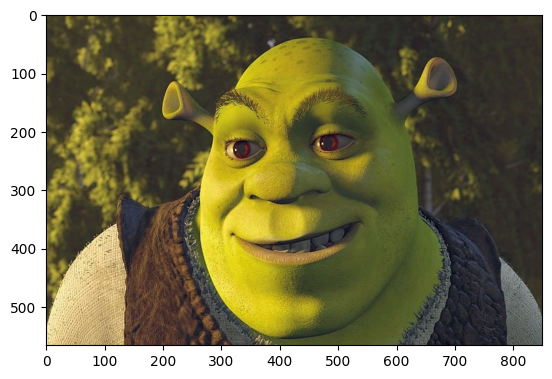

In [6]:
url = 'https://cdnstatic.rg.ru/crop910x606/uploads/images/161/31/13/kinopoisk.ru-Shrek-13985.jpg'
orig_img = imread(url)

plt.imshow(orig_img)
plt.show()


In [7]:
def draw_white_square(img):
    y,x,c = img.shape
    res_img = img.copy()
    s_to_color = y*x *0.1
    k = round(math.sqrt(s_to_color))
    y_to_color = range(int(y/2 - k*0.5) , int(y/2 + k*0.5)+1)
    x_to_color = range(int(x/2 - k*0.5) , int(x/2 + k*0.5)+1)
    for i in range(len(y_to_color)):
            for j in range(len(x_to_color)):
                    res_img[y_to_color[i],x_to_color[j]] = [255,255,255]
    return res_img

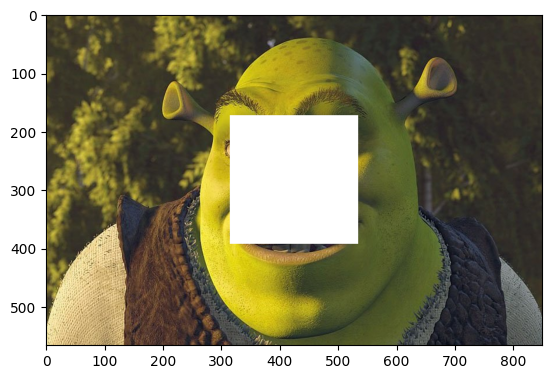

In [8]:
res_img = draw_white_square(orig_img)
plt.imshow(res_img)
plt.show()

### 2. Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

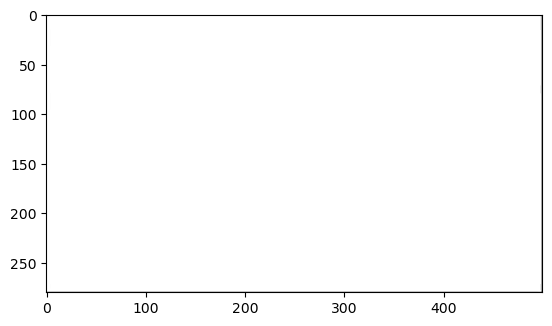

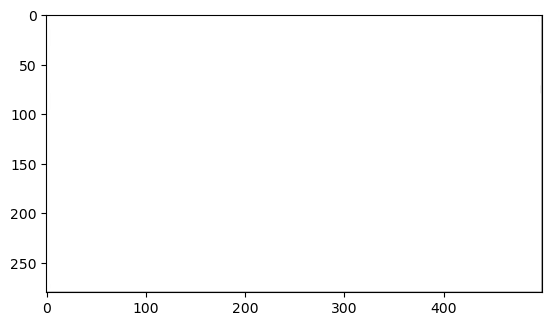

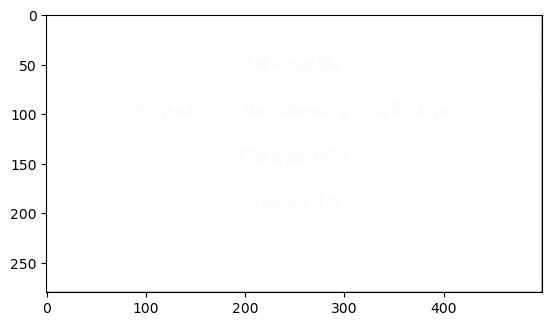

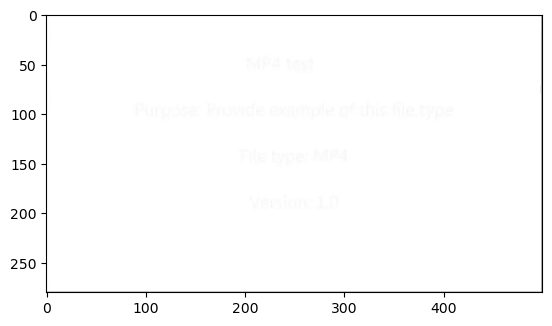

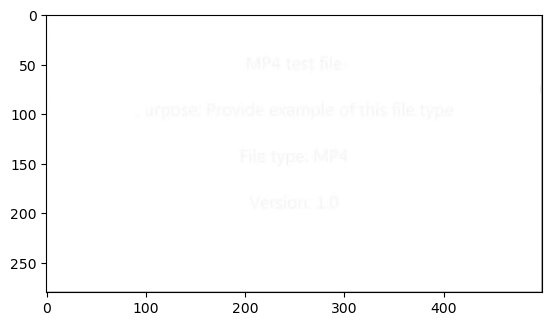

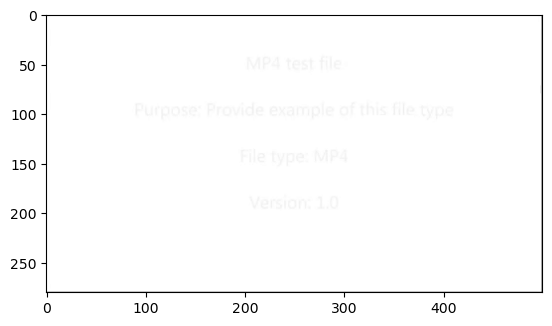

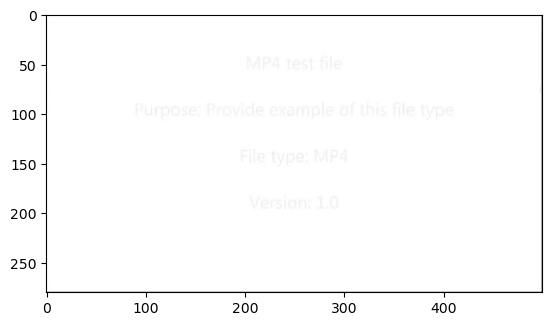

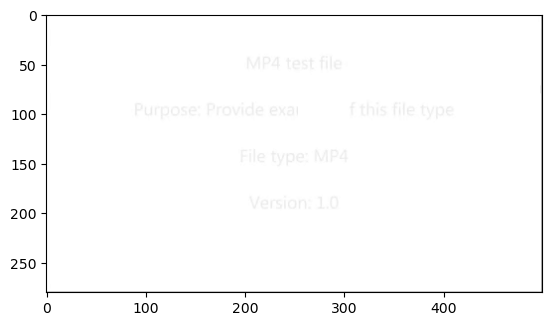

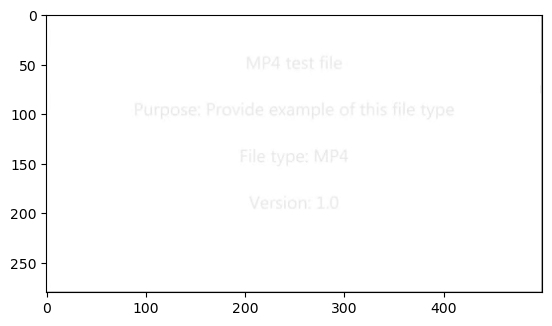

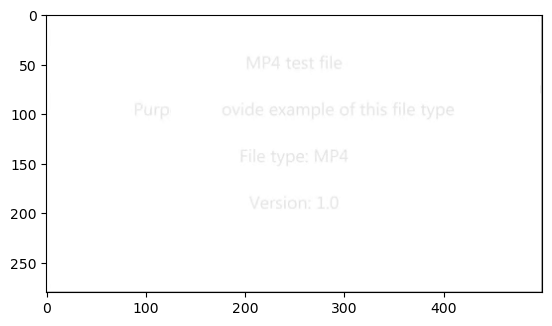

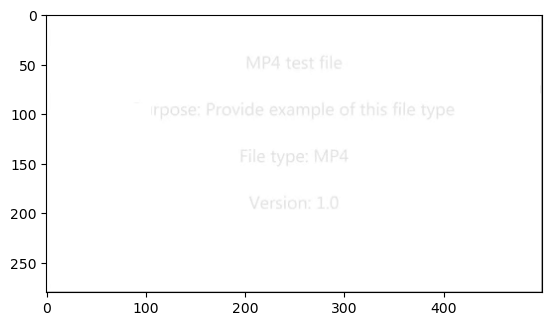

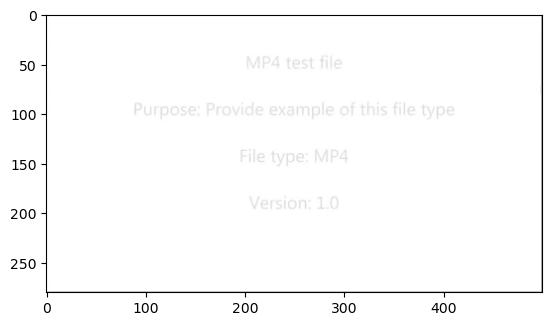

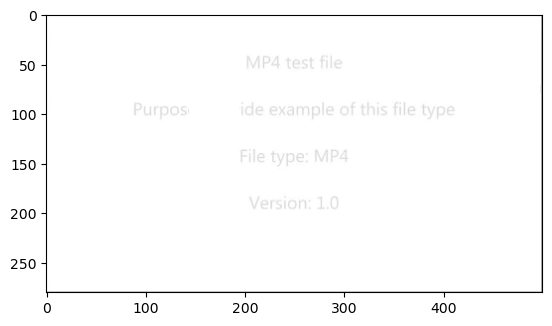

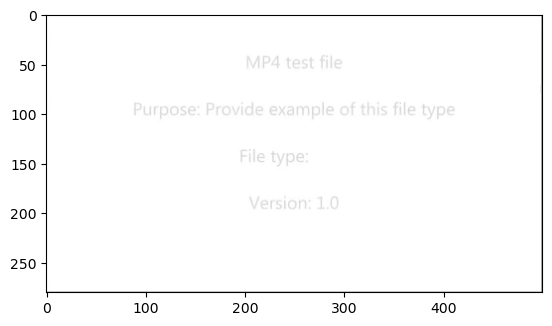

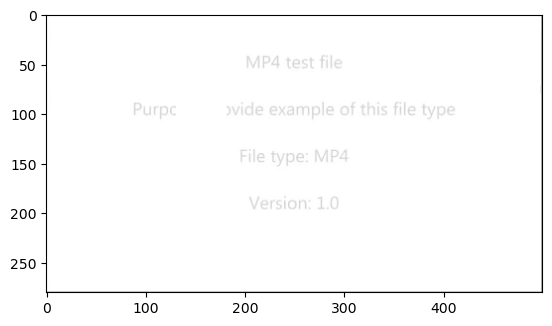

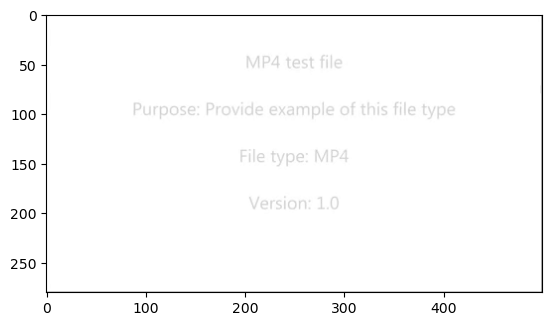

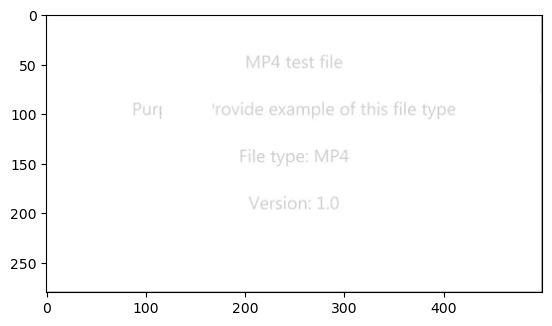

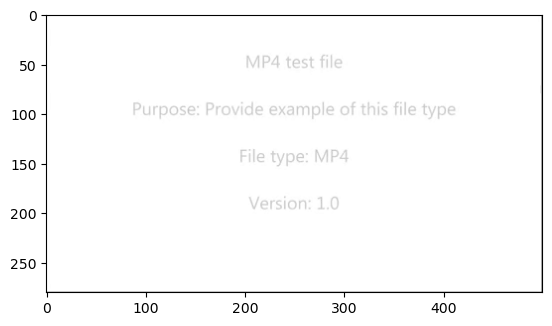

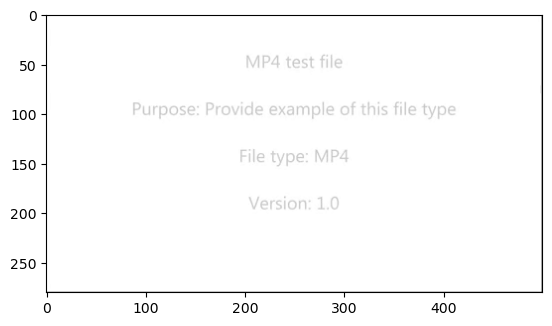

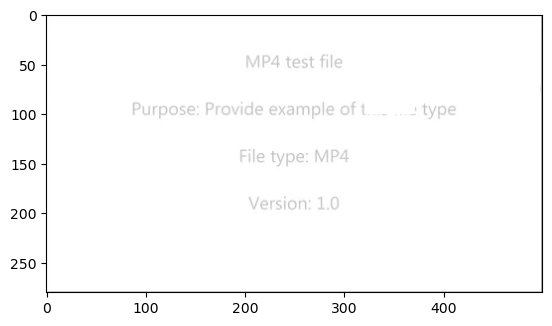

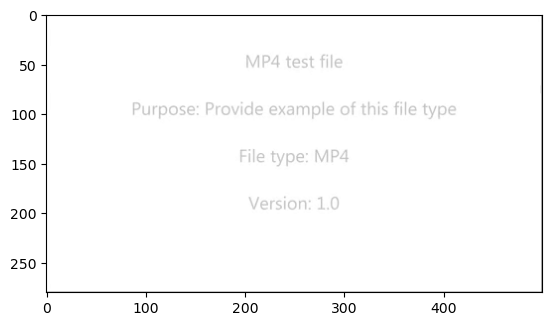

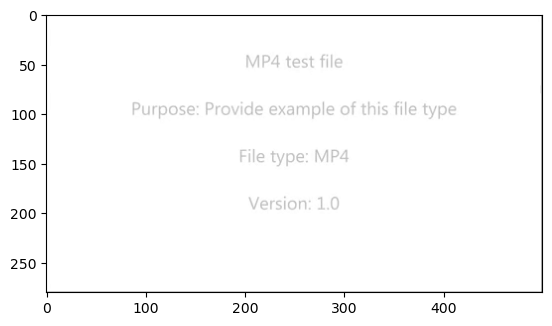

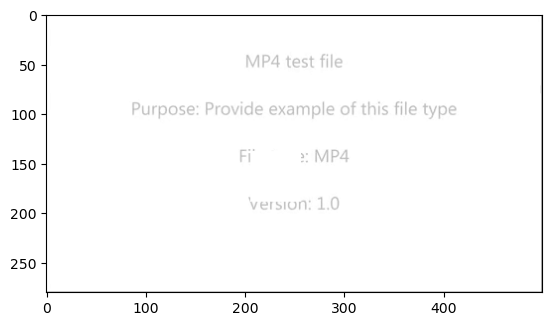

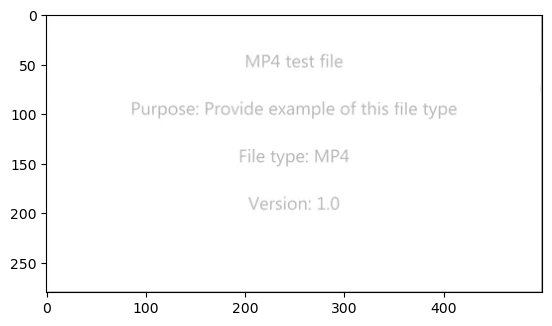

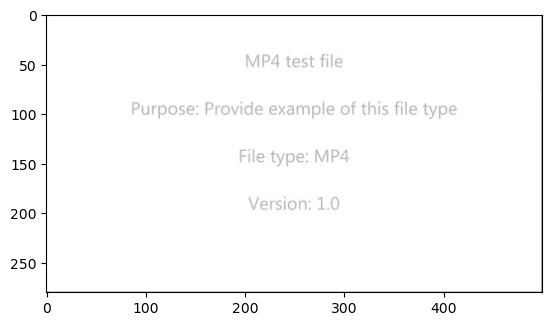

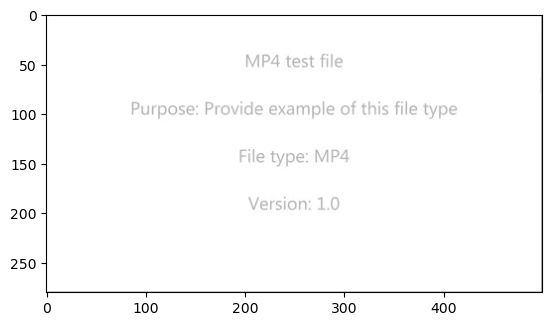

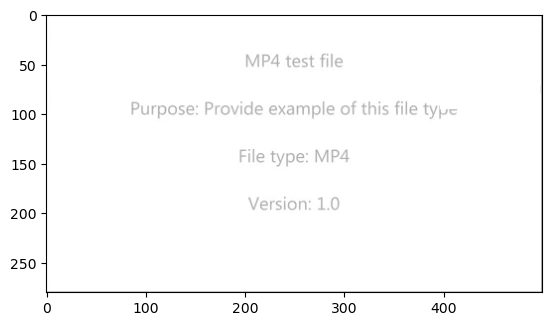

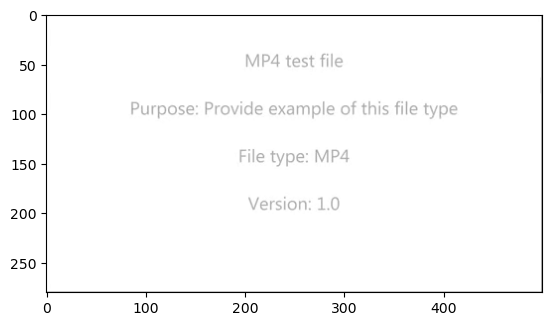

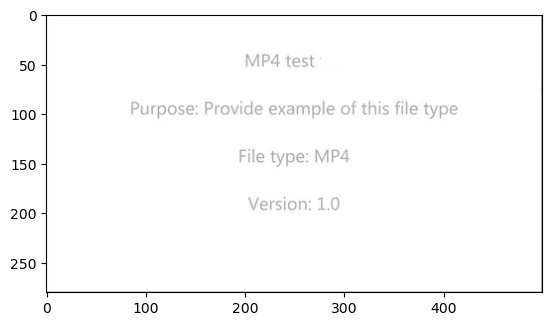

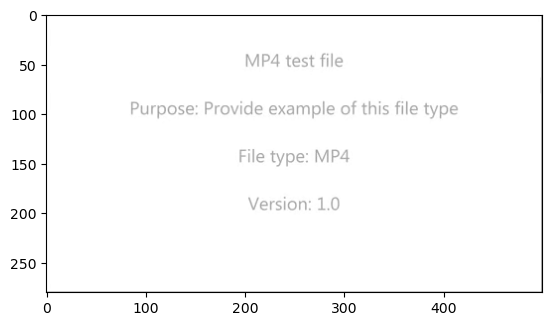

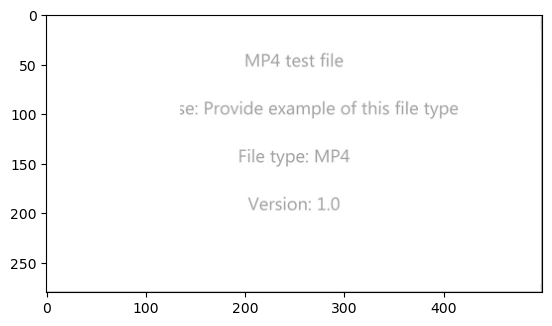

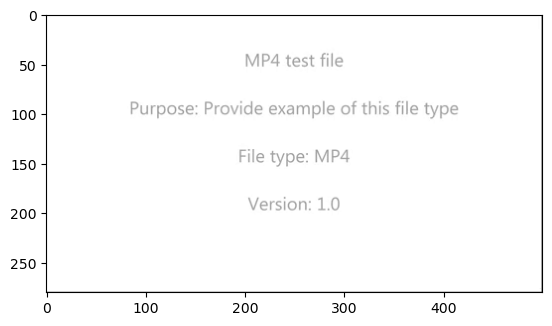

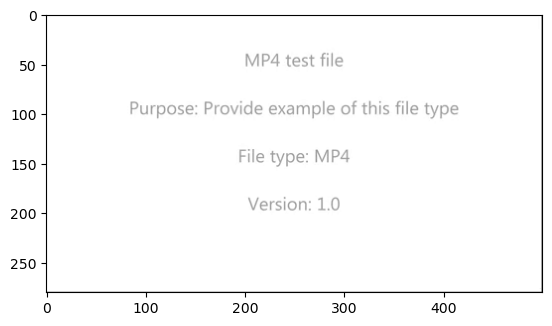

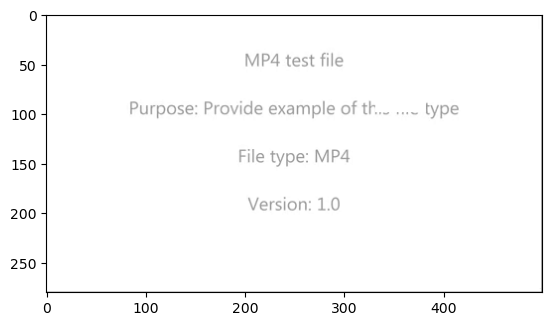

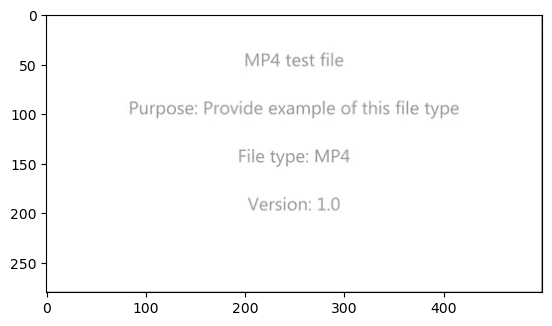

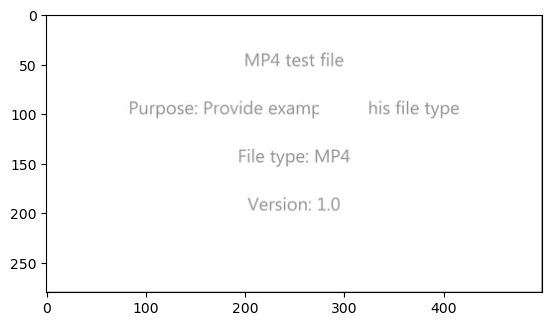

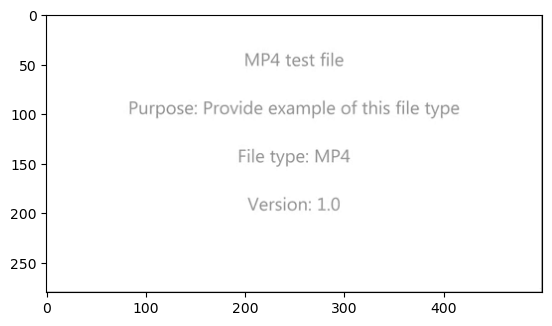

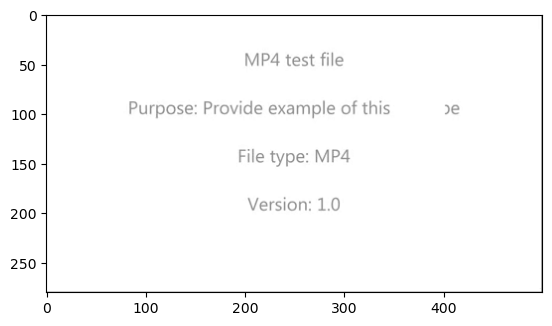

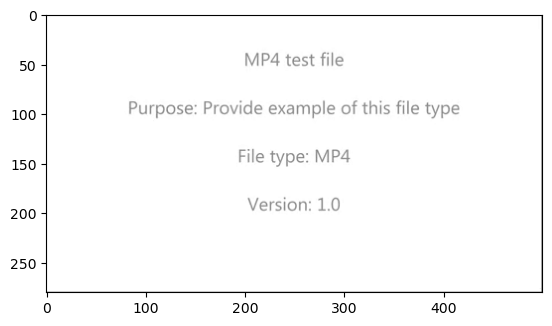

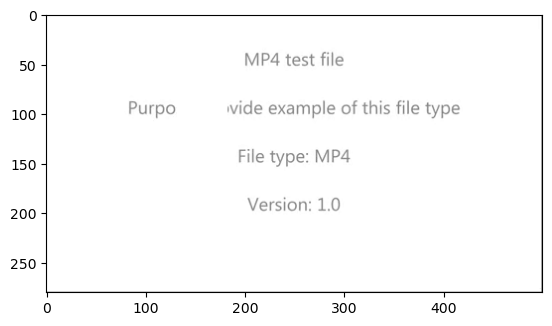

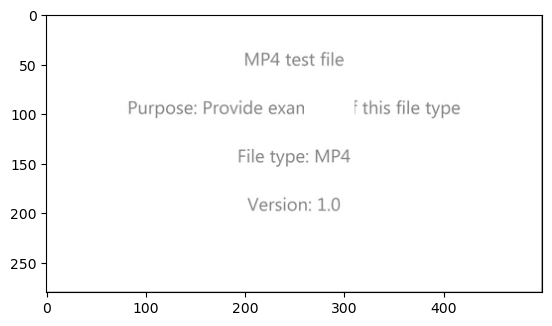

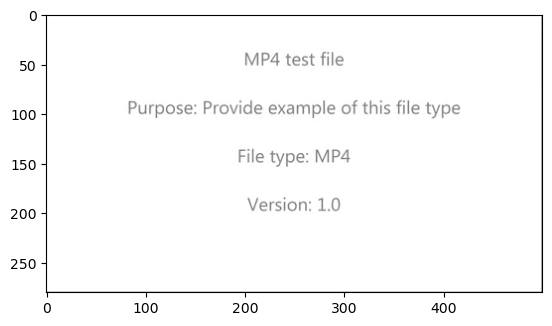

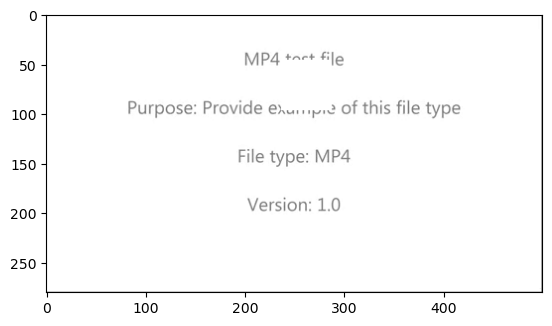

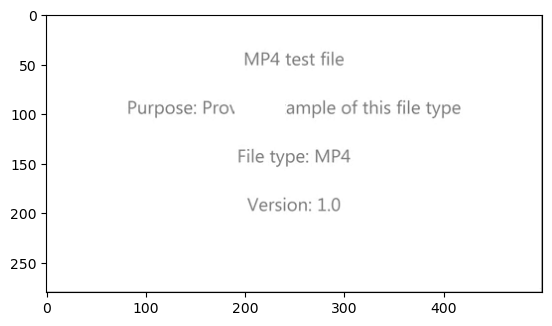

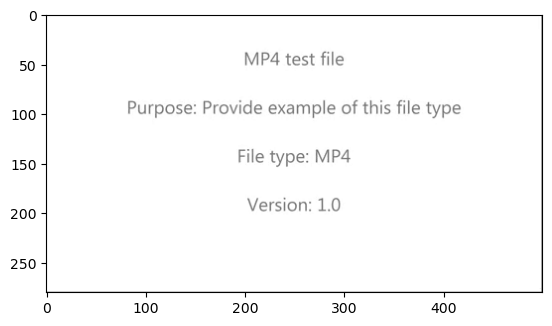

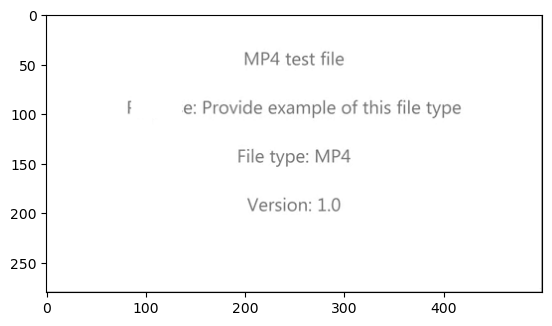

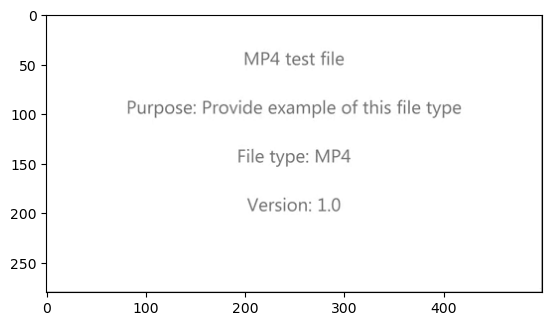

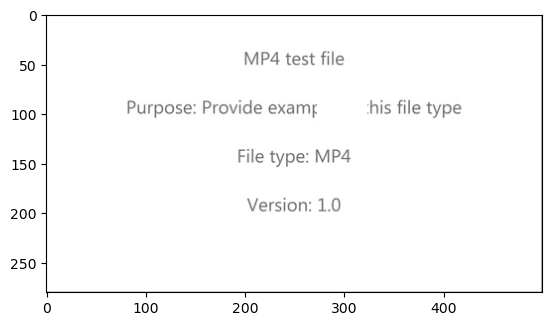

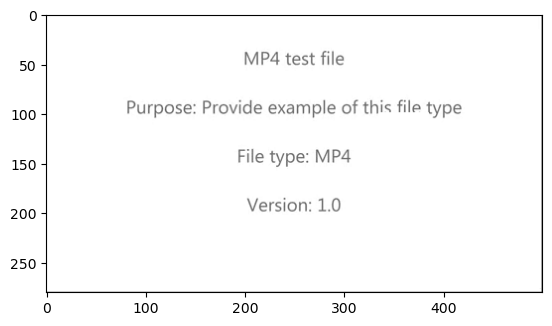

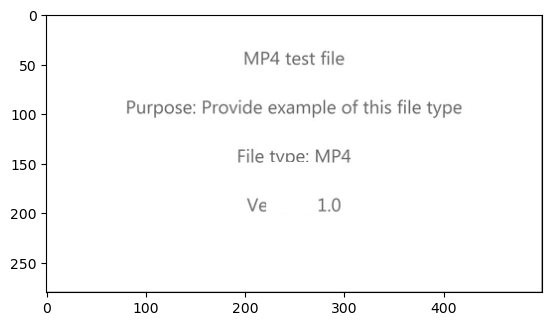

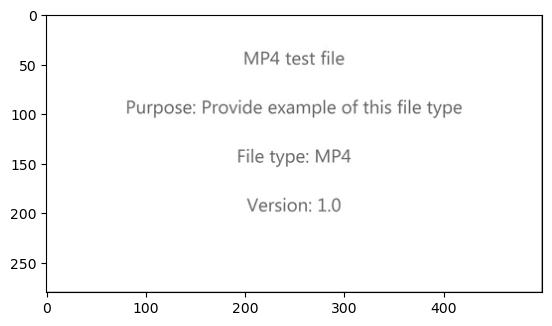

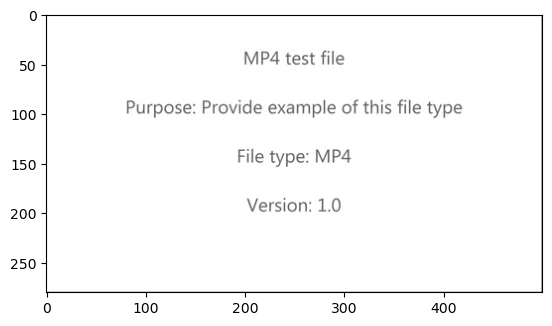

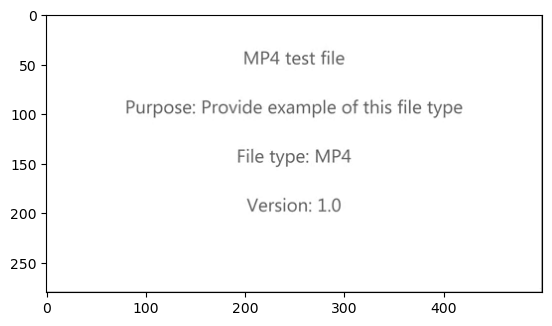

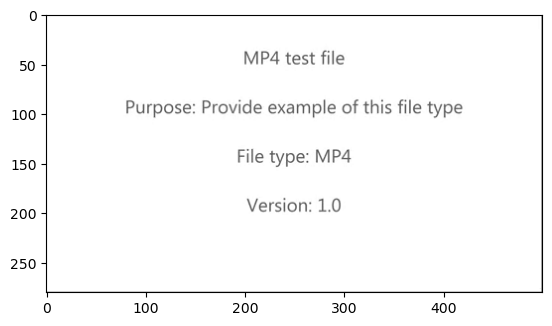

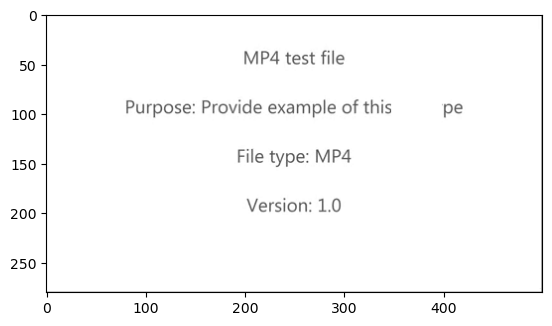

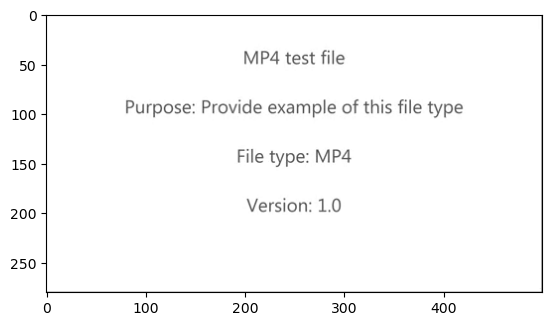

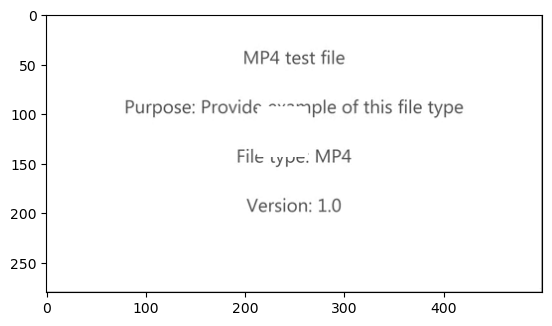

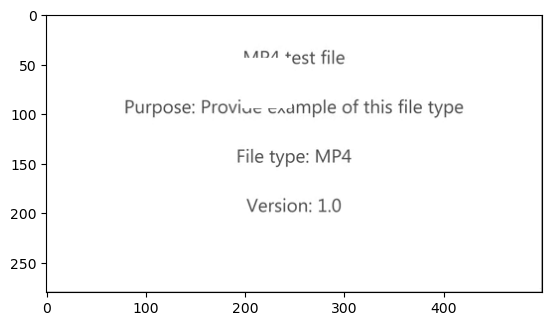

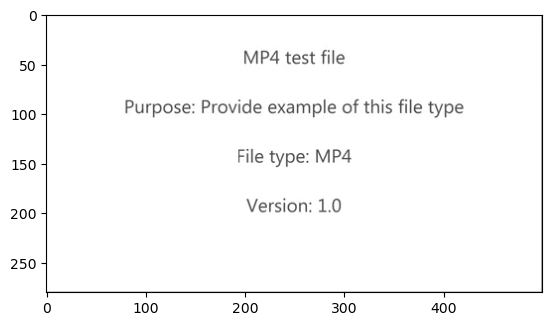

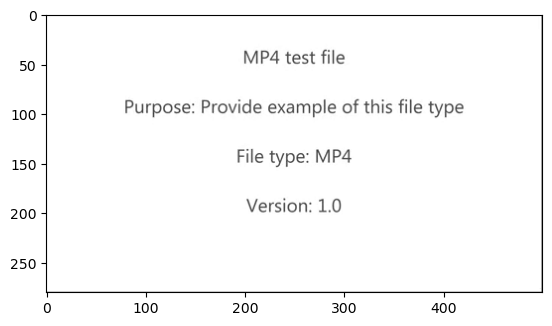

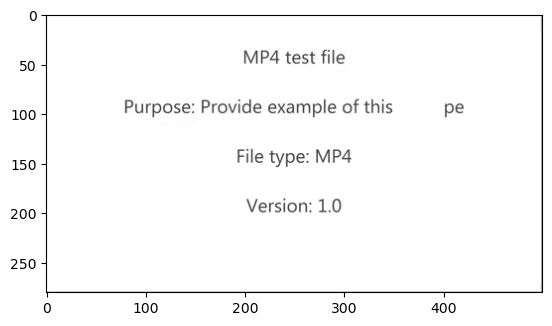

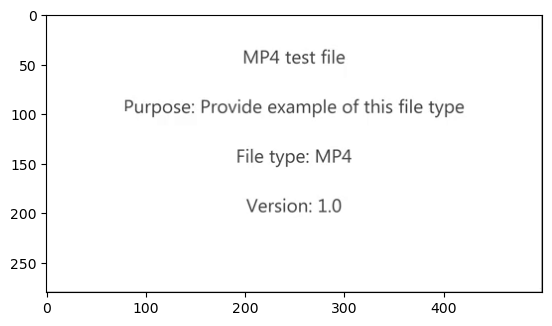

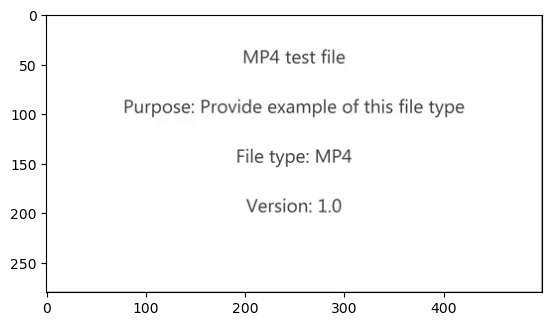

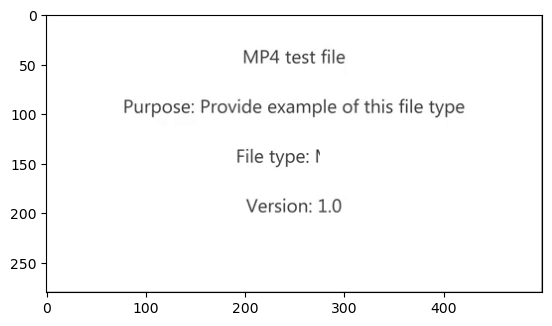

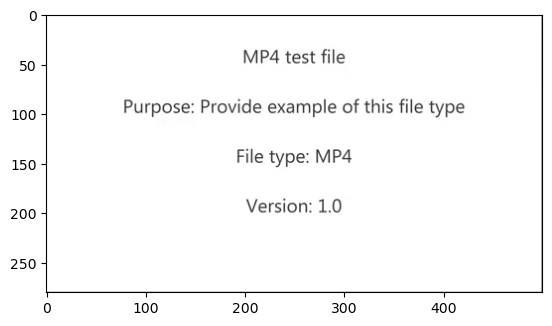

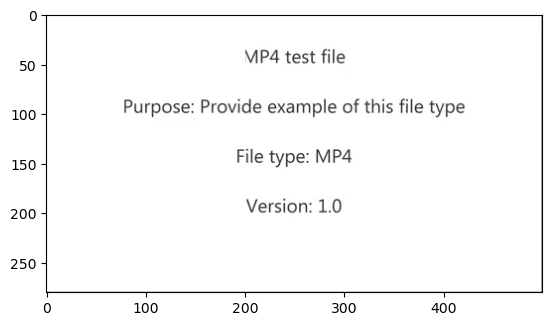

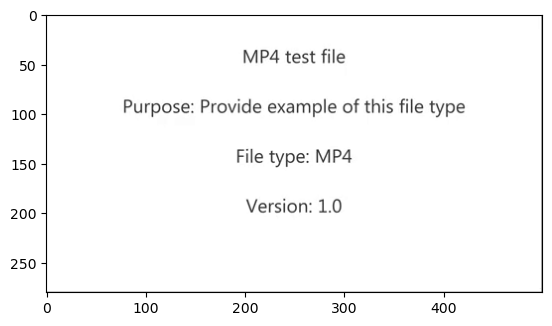

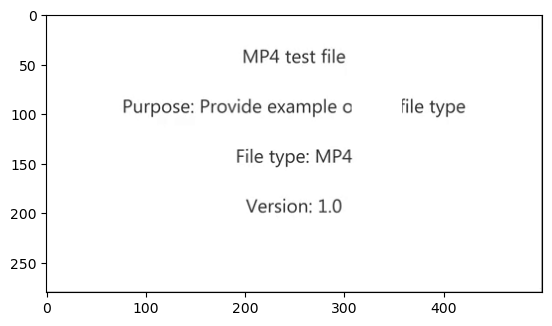

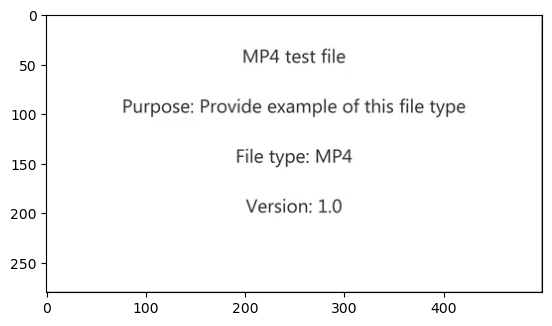

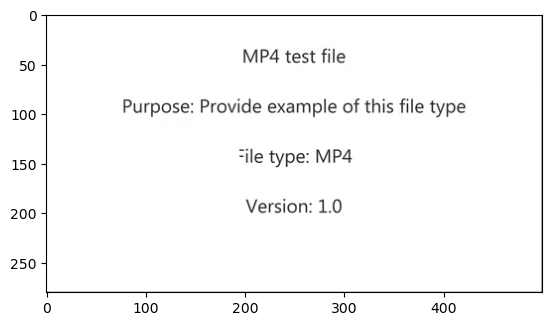

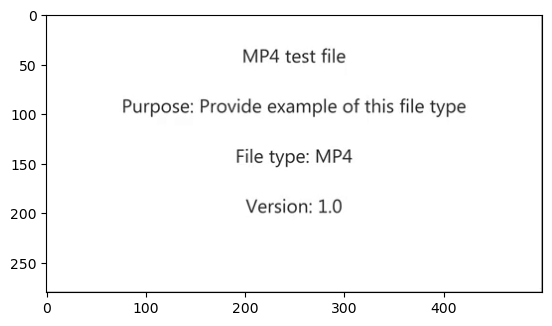

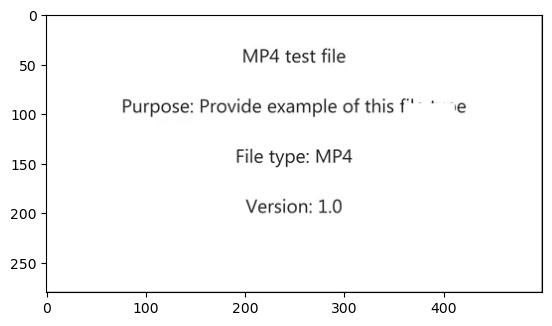

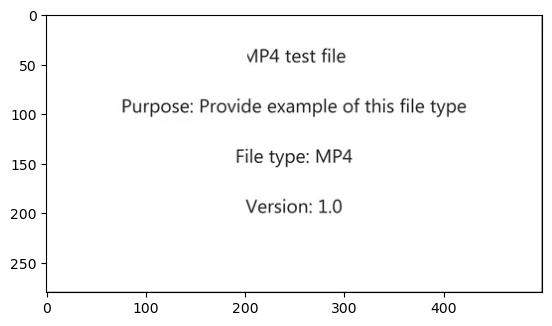

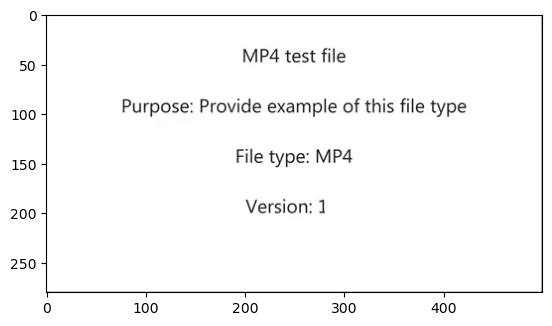

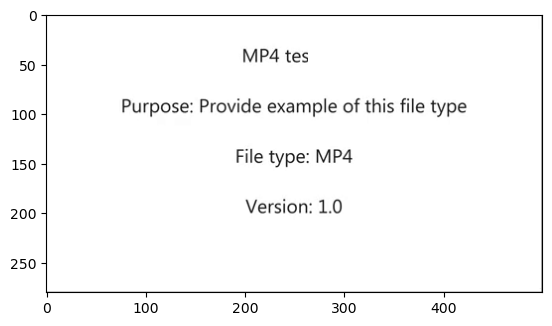

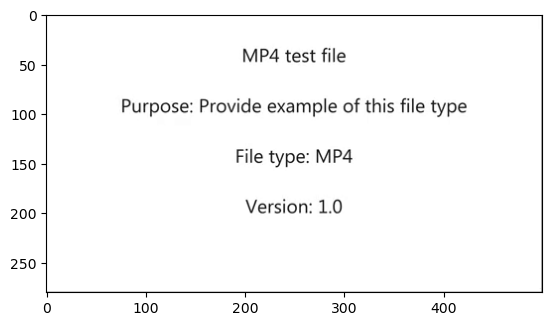

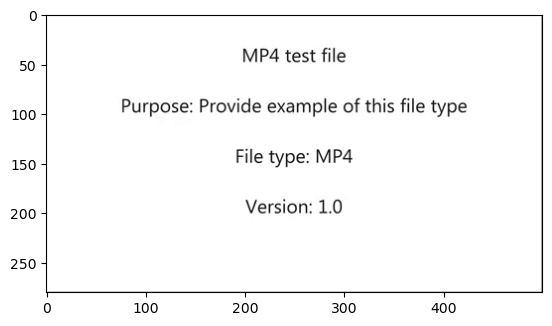

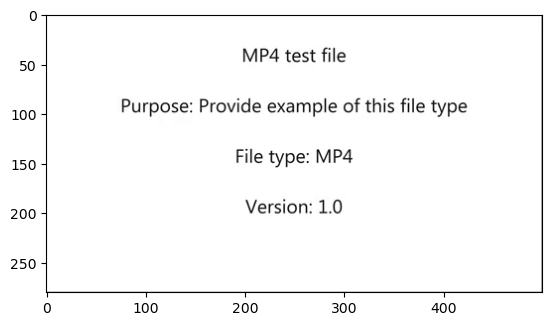

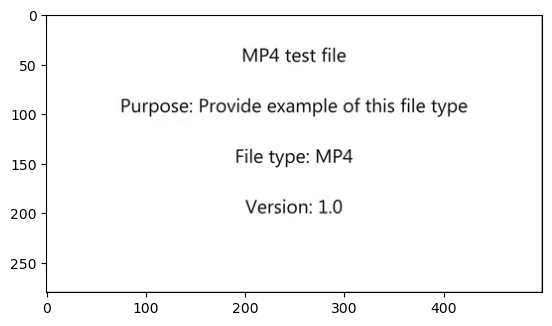

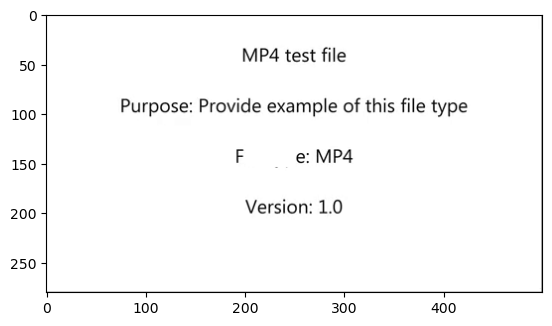

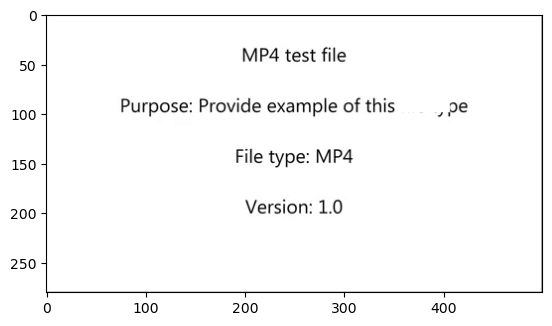

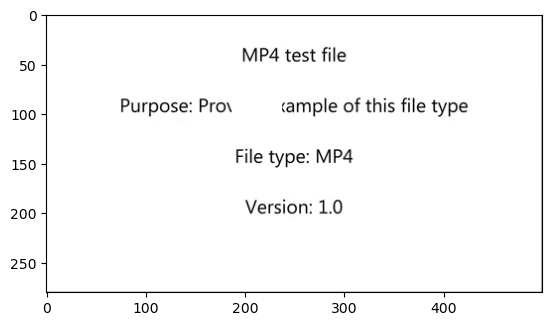

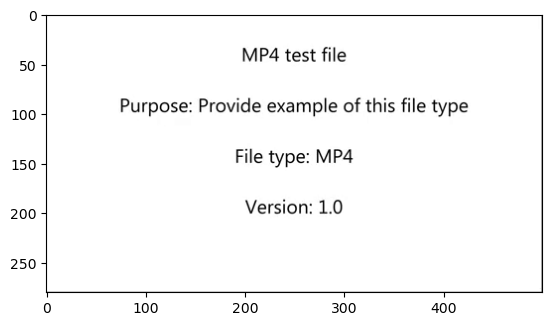

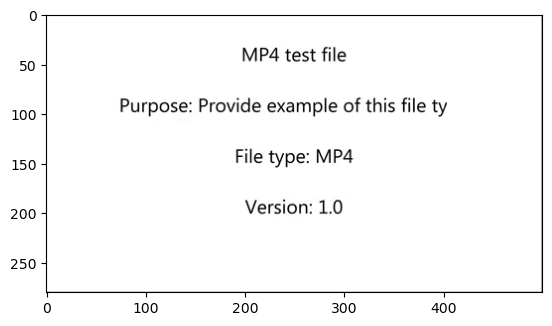

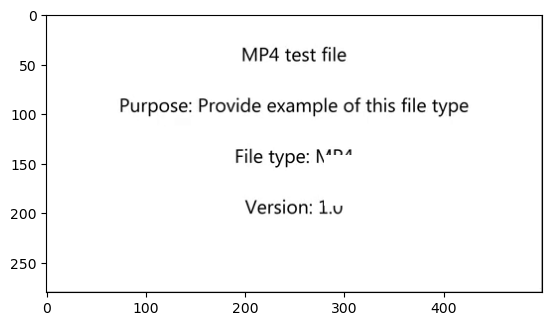

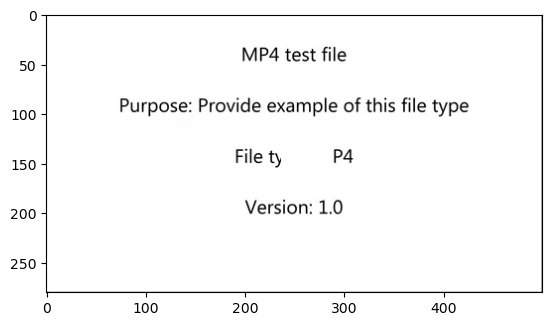

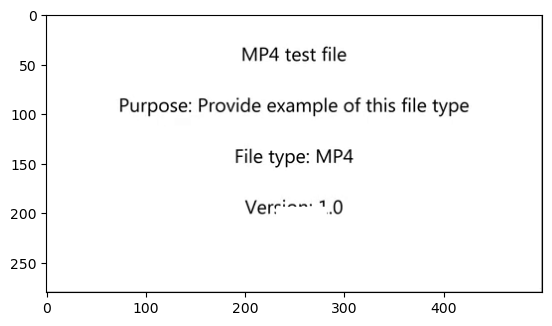

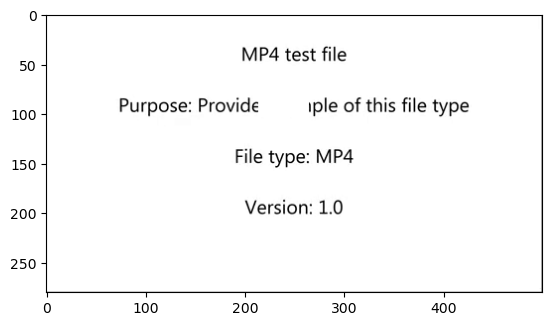

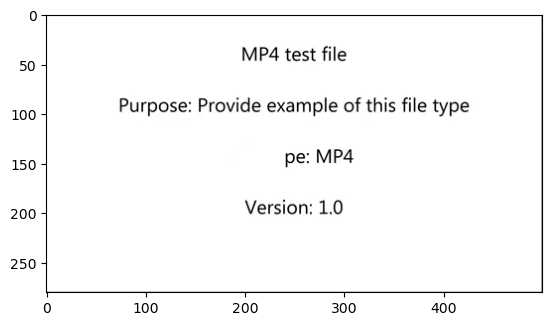

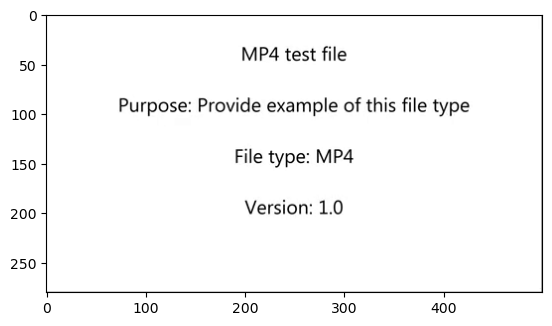

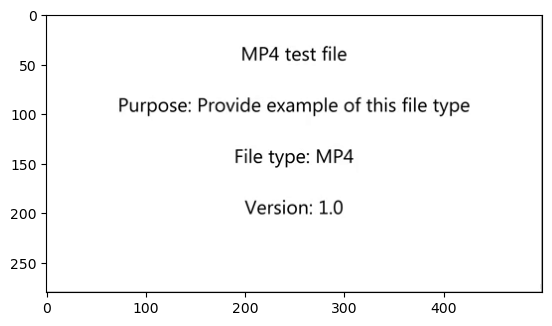

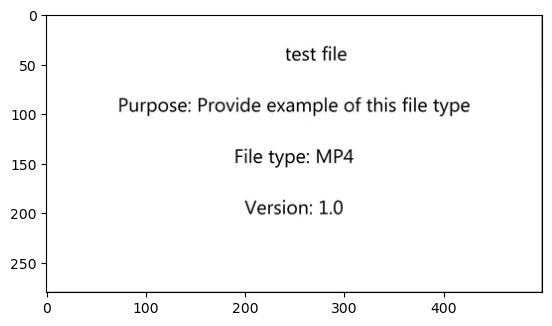

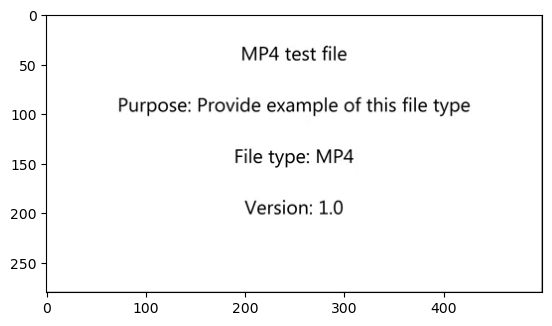

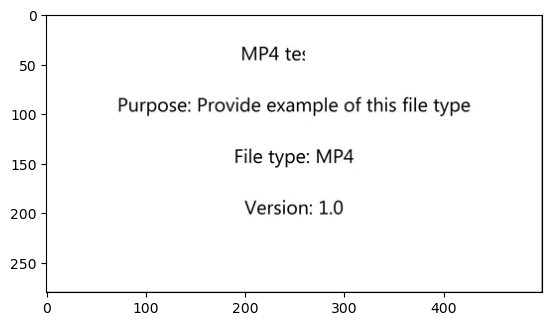

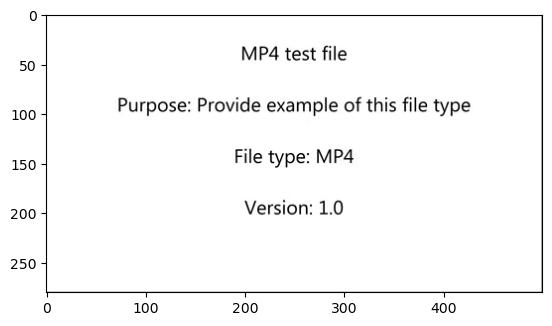

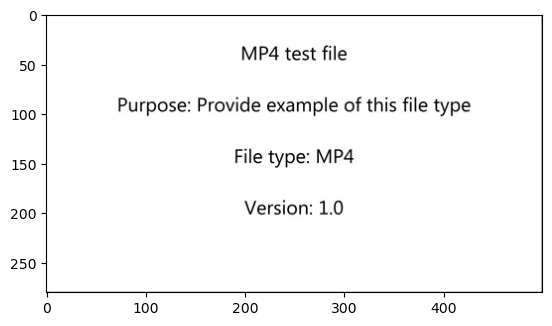

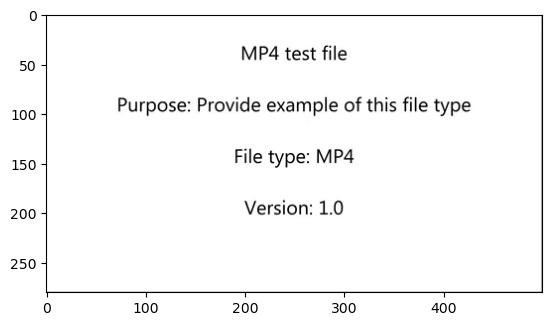

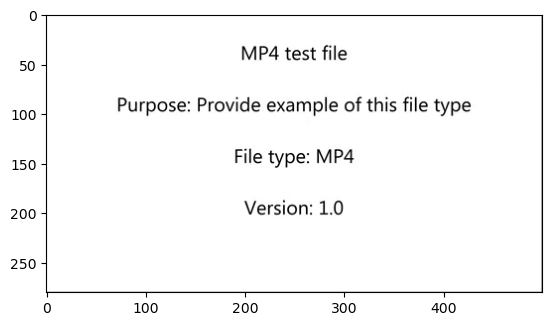

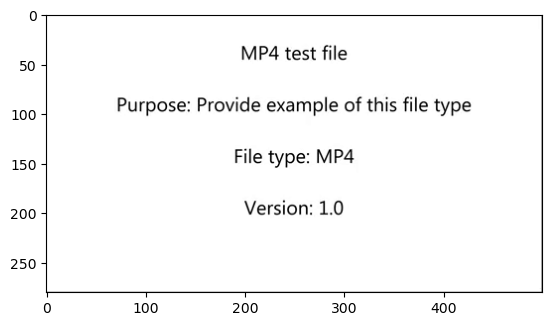

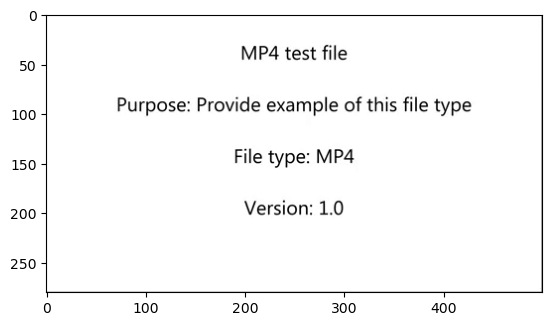

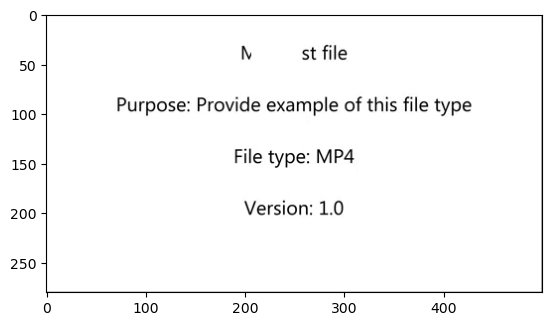

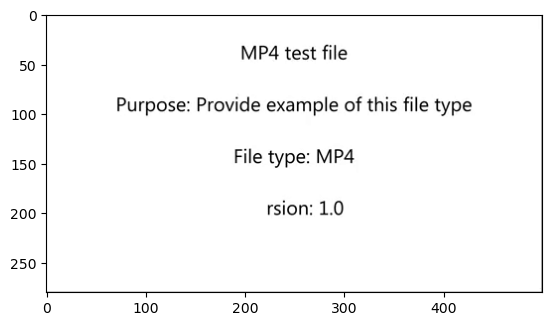

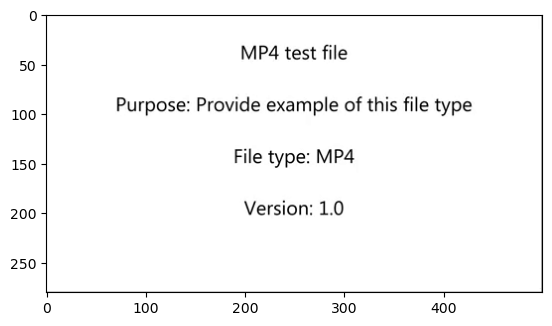

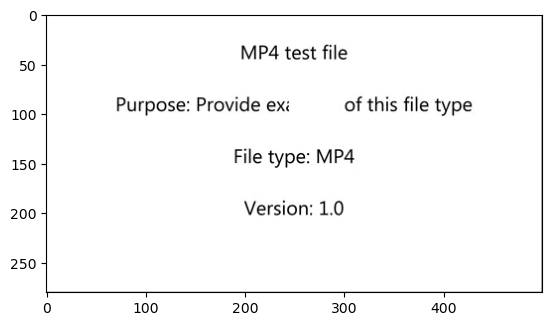

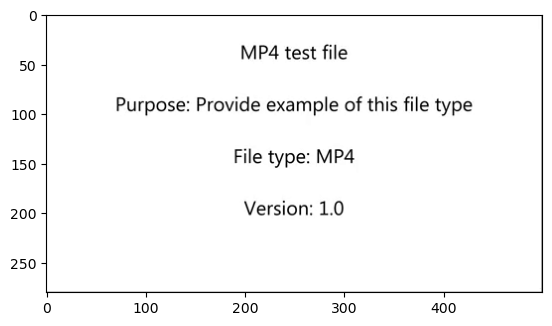

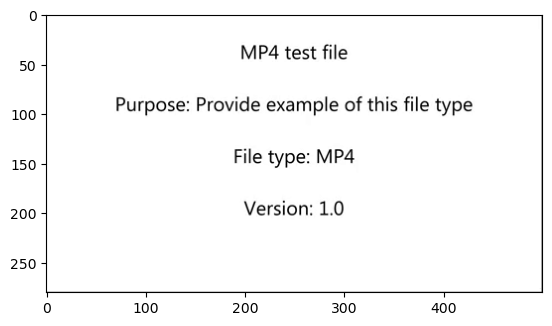

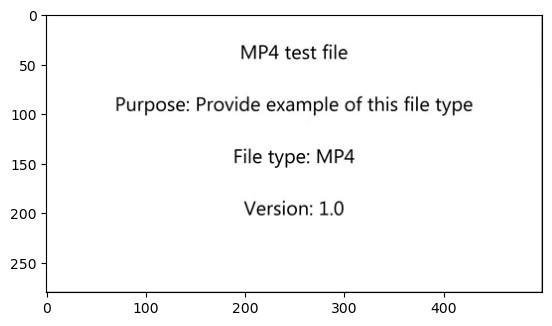

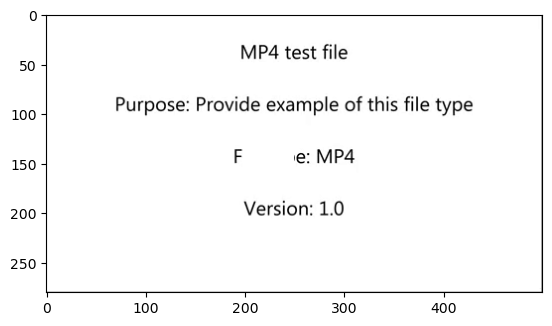

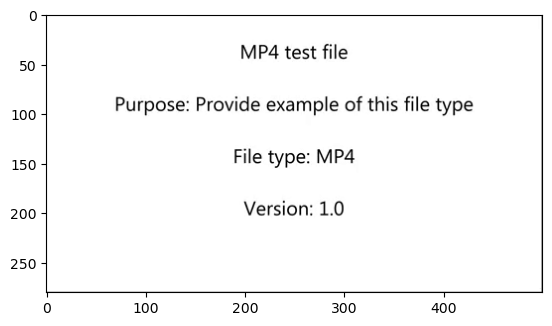

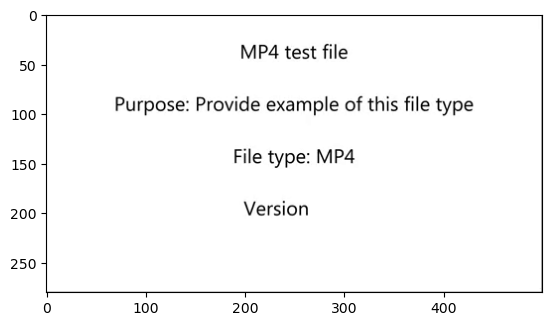

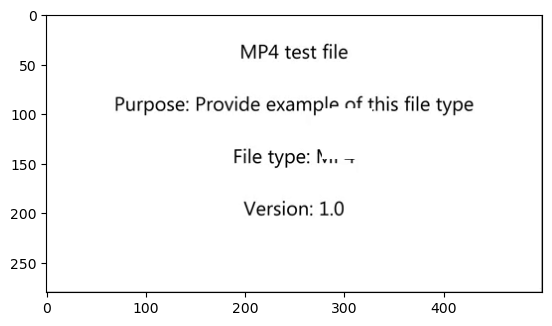

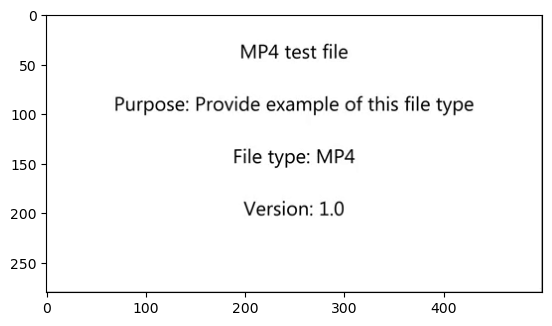

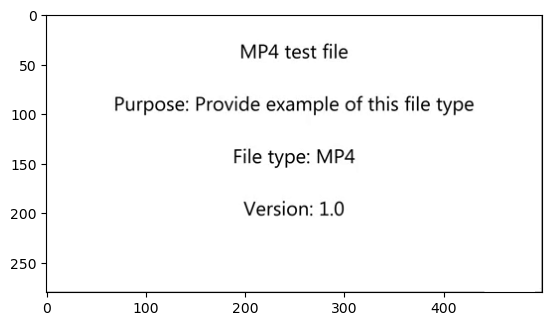

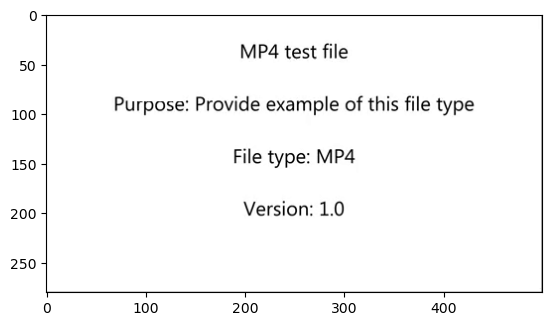

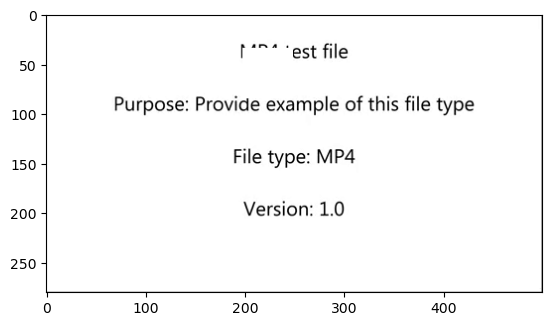

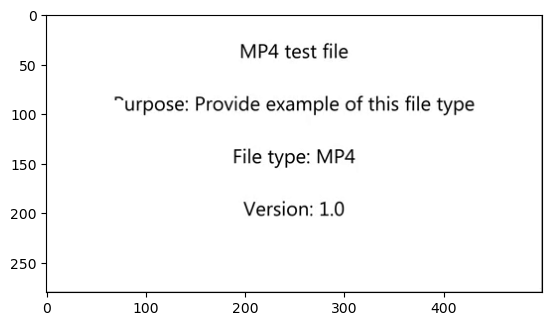

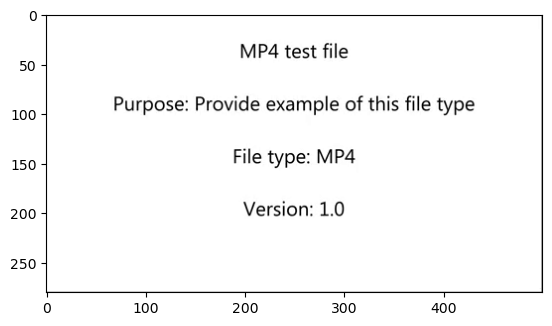

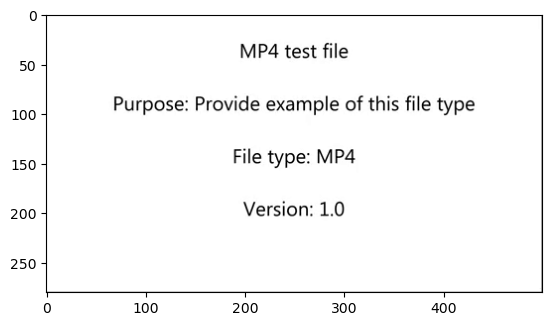

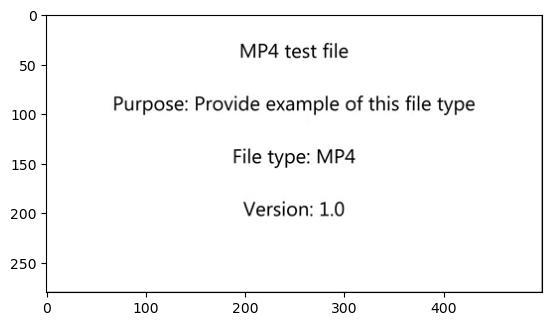

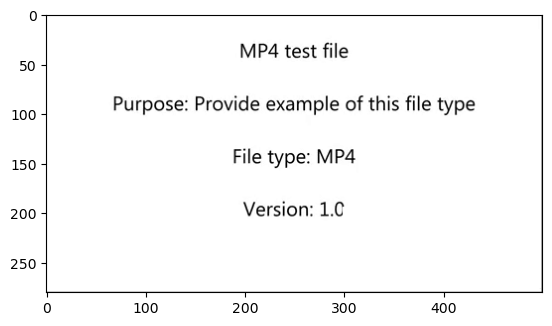

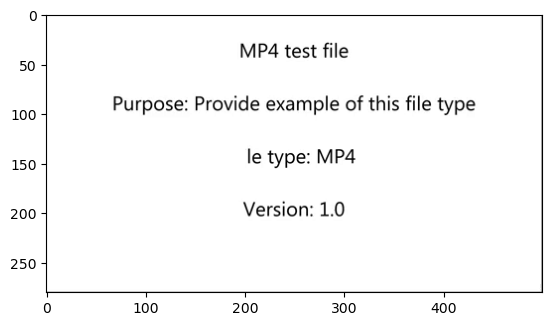

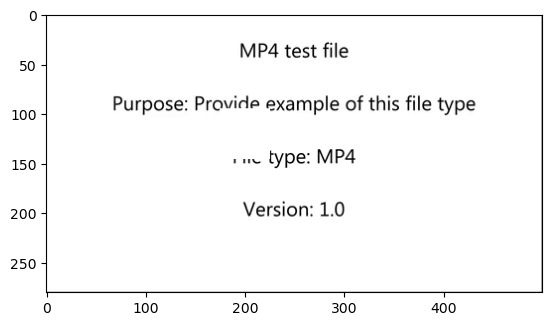

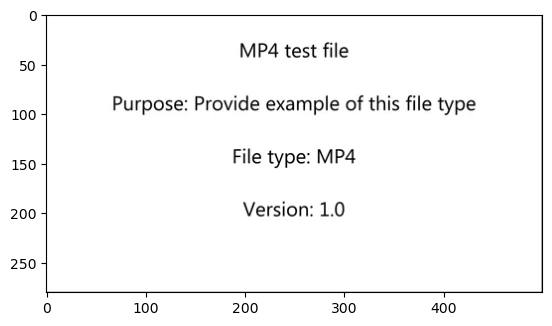

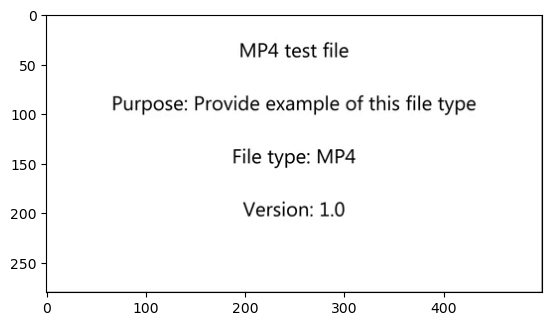

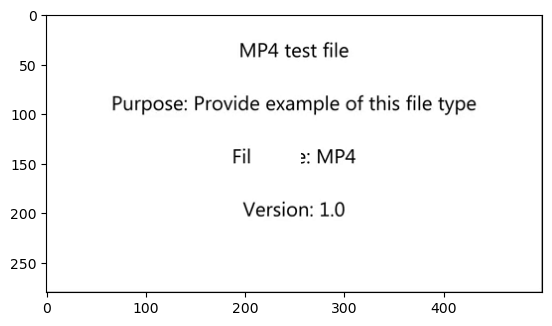

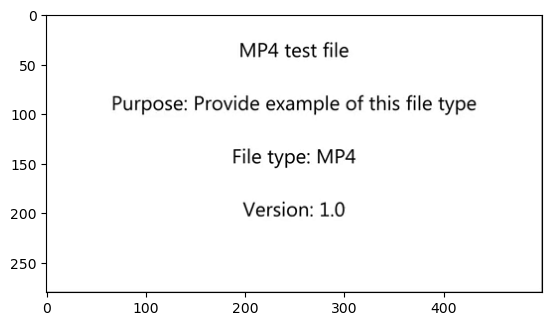

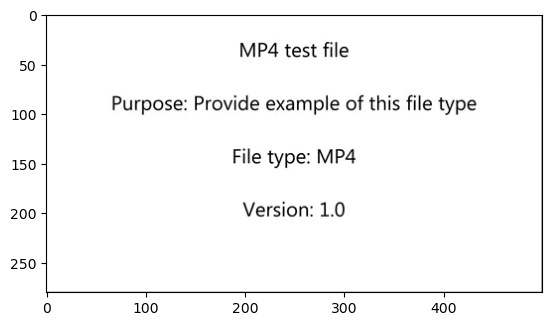

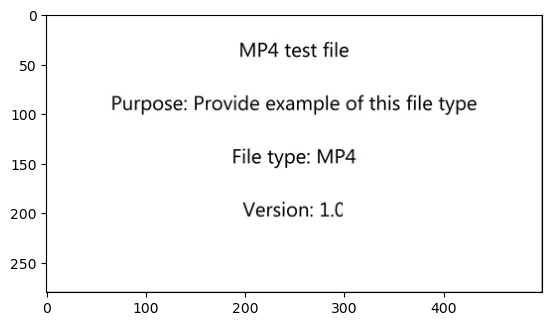

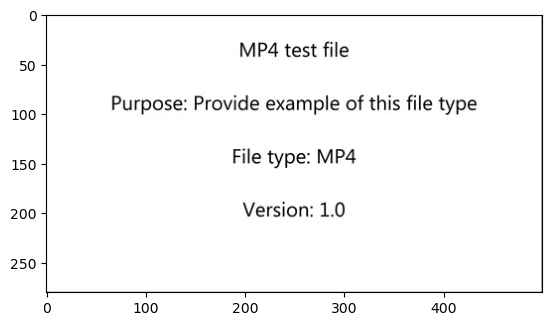

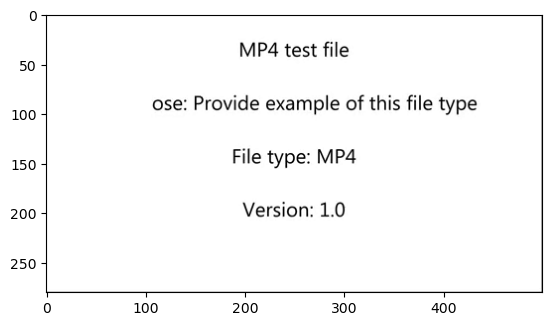

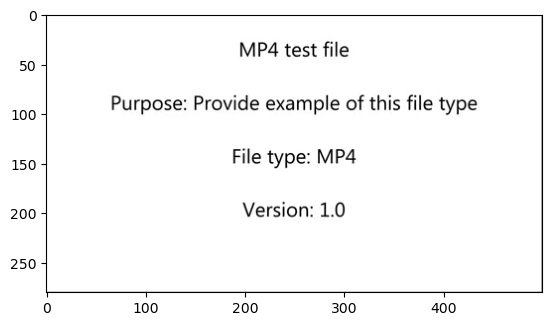

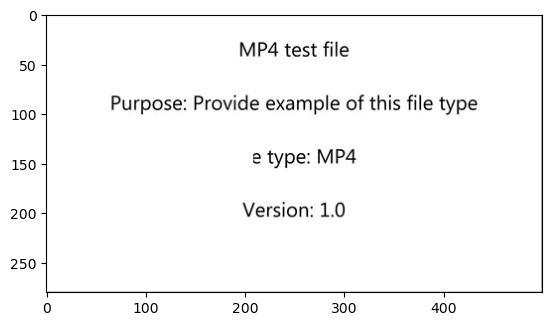

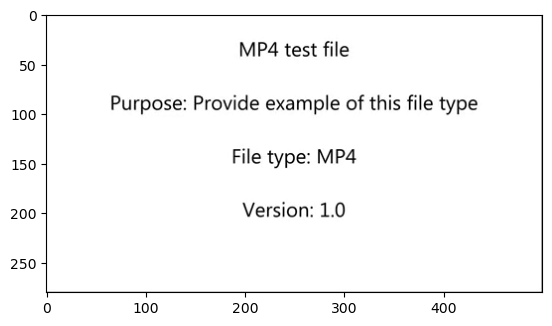

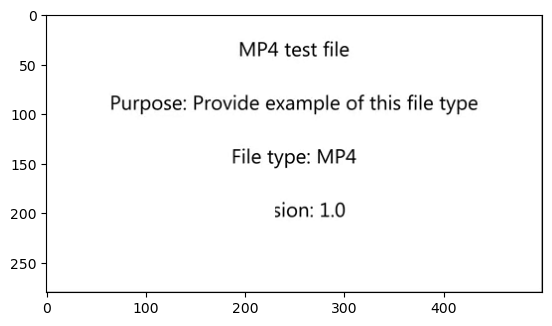

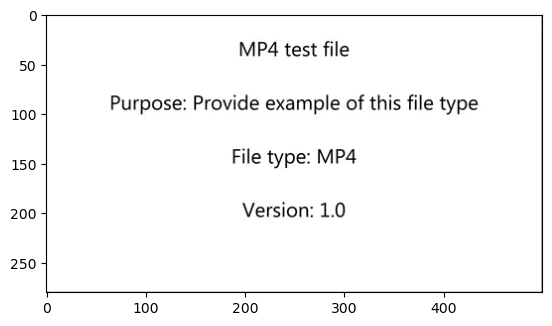

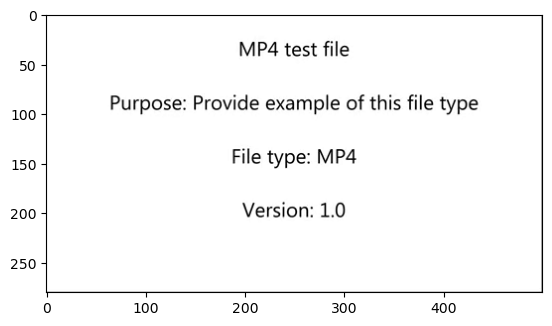

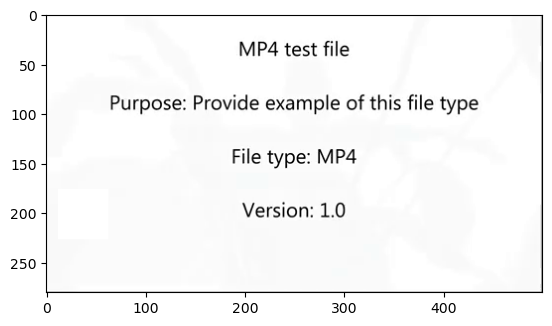

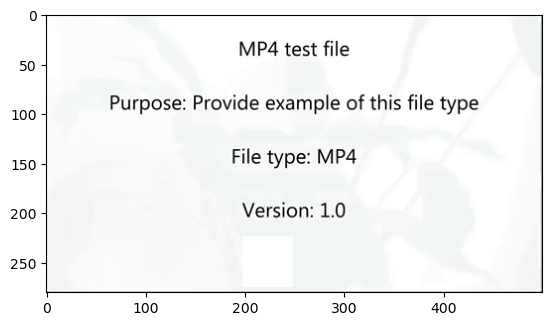

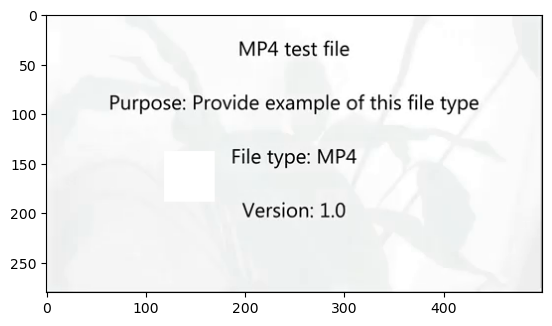

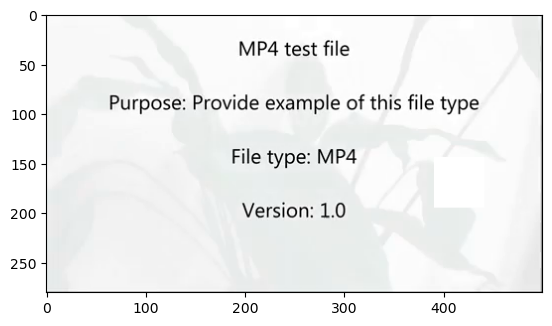

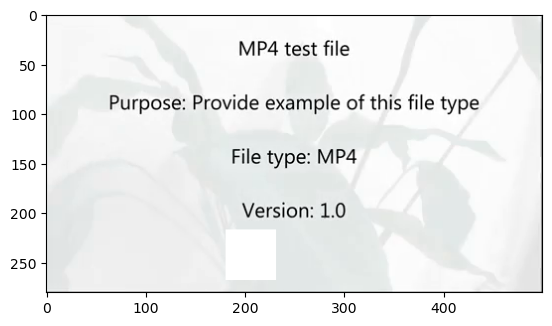

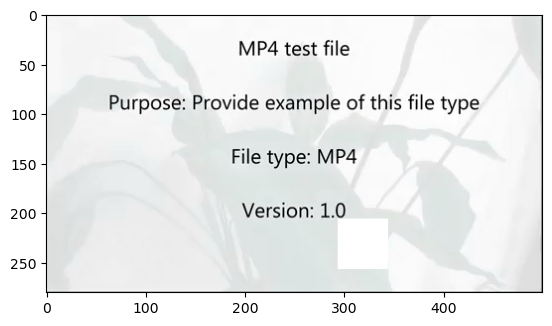

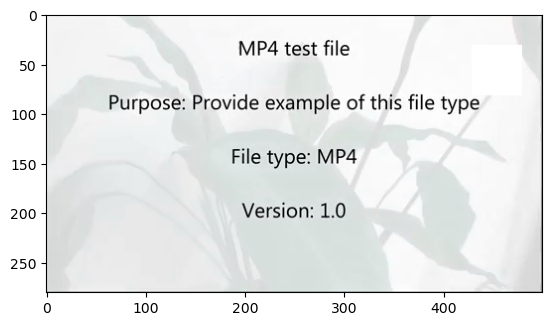

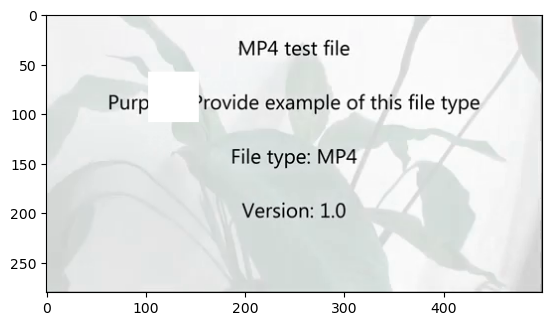

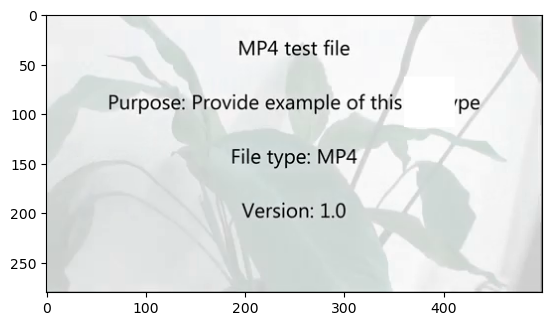

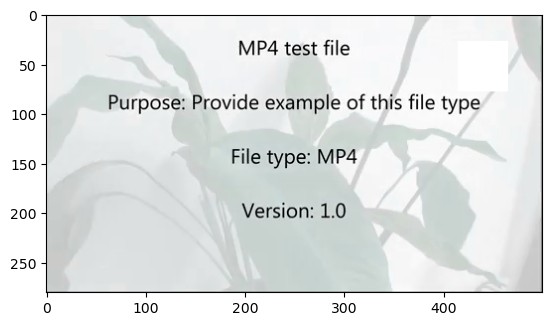

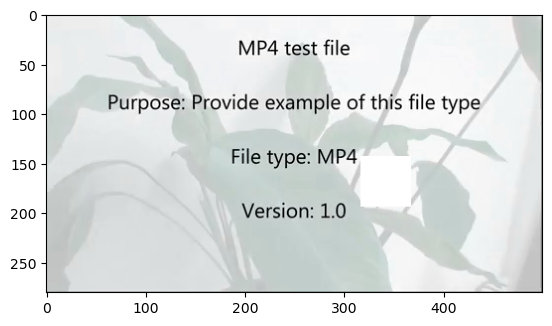

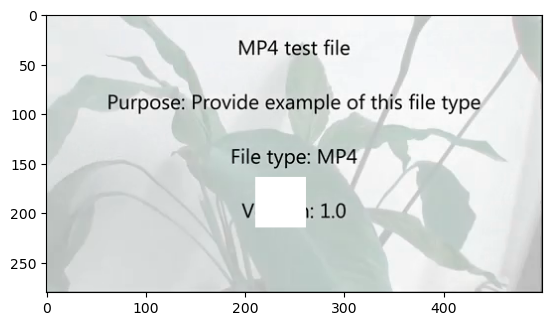

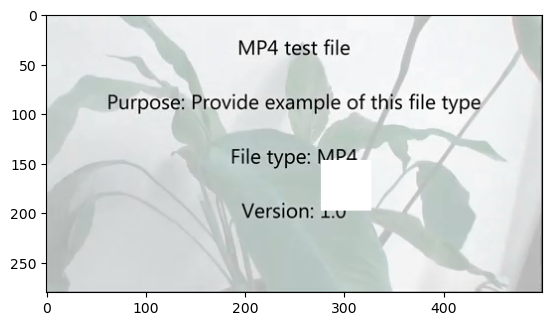

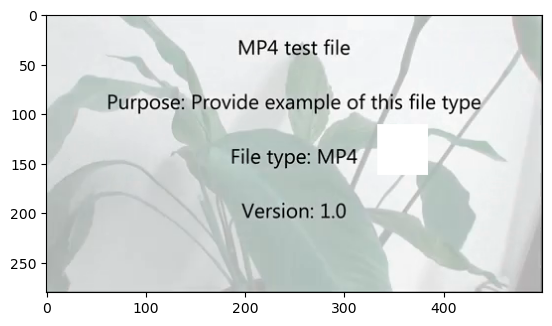

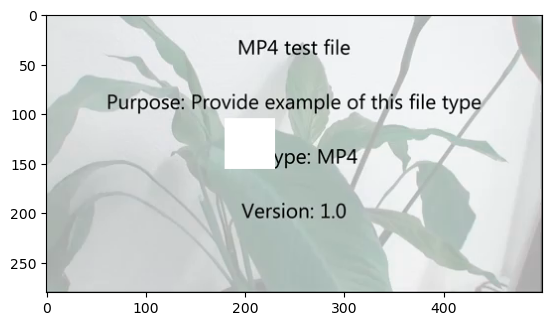

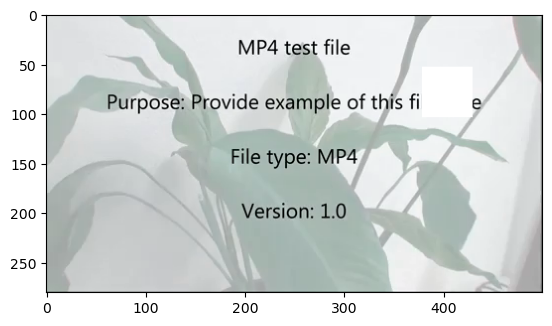

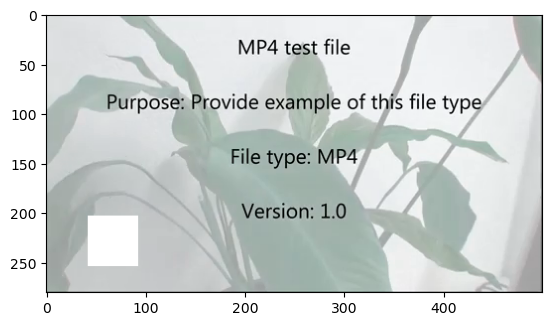

KeyboardInterrupt: 

In [ ]:
url = 'https://example-files.online-convert.com/video/mp4/example_small.mp4'
capture = cv2.VideoCapture(url)
while True:
    rtrn, image = capture.read()
    if image is None:
        break

    size = 50
    x, y, _ = image.shape

    random_x = np.random.randint(0, y - size)
    random_y = np.random.randint(0, x - size)

    cv2.rectangle(image, (random_x, random_y), (random_x + size, random_y + size), (255, 255, 255), -1)
    plt.imshow(image)
    plt.show()

capture.release()


### 3. Работа с аудио
1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощиью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

In [16]:
audio_data = 'https://dagshub.com/kinkusuma/esc50-dataset/raw/master/dataset/1-100032-A-0.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))

In [18]:
import IPython.display as ipd
ipd.Audio(audio_data)

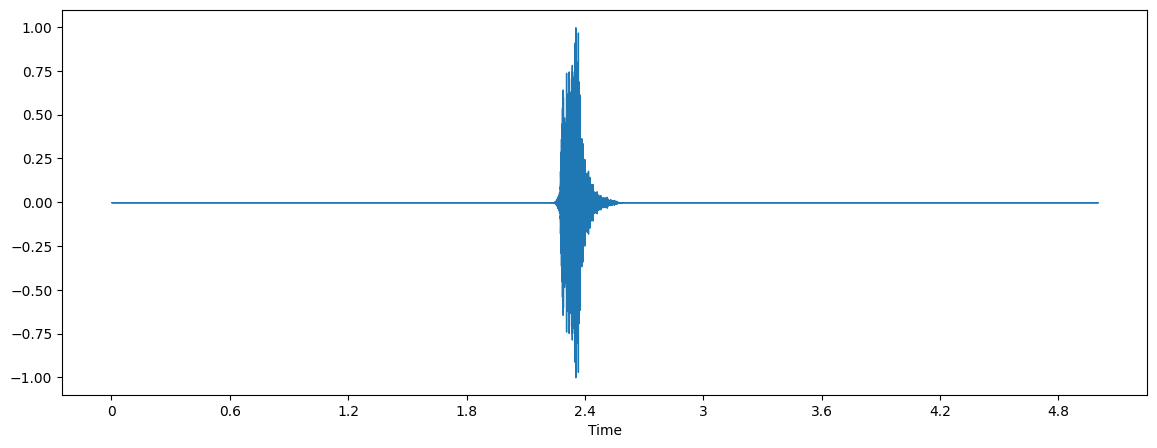

In [17]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)

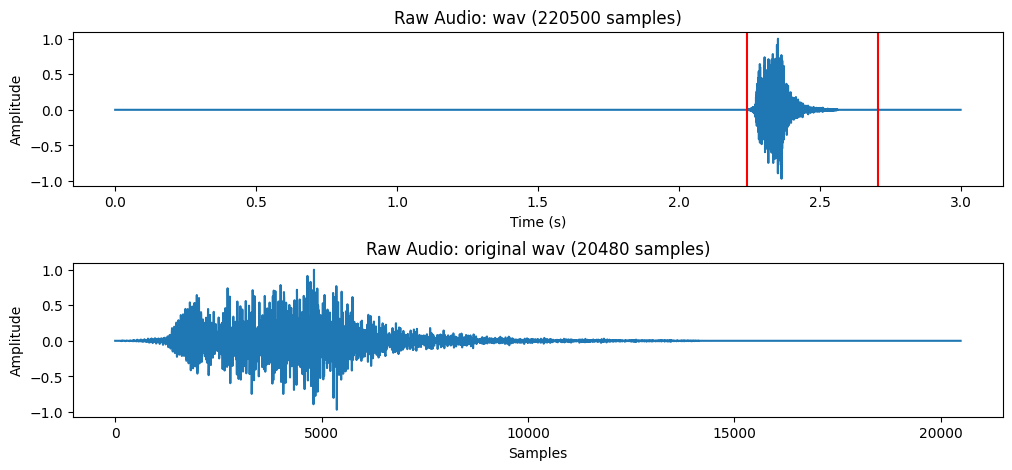

In [21]:
three_seconds = sample_rate * 3
data_ = data[:three_seconds]
timesteps = np.arange(len(data_)) / sample_rate  # in seconds

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip
ax[0].plot(timesteps, data_)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format('wav', len(data)))


n_fft = 1024*20 # frame length
start = 98900 # start at a part of the sound thats not silence..
x = data_[start:start+n_fft]

# mark location of frame in the entire signal
ax[0].axvline(start/sample_rate, c='r')
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# plot N samples
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: {} ({} samples)'.format('original wav', len(x)));

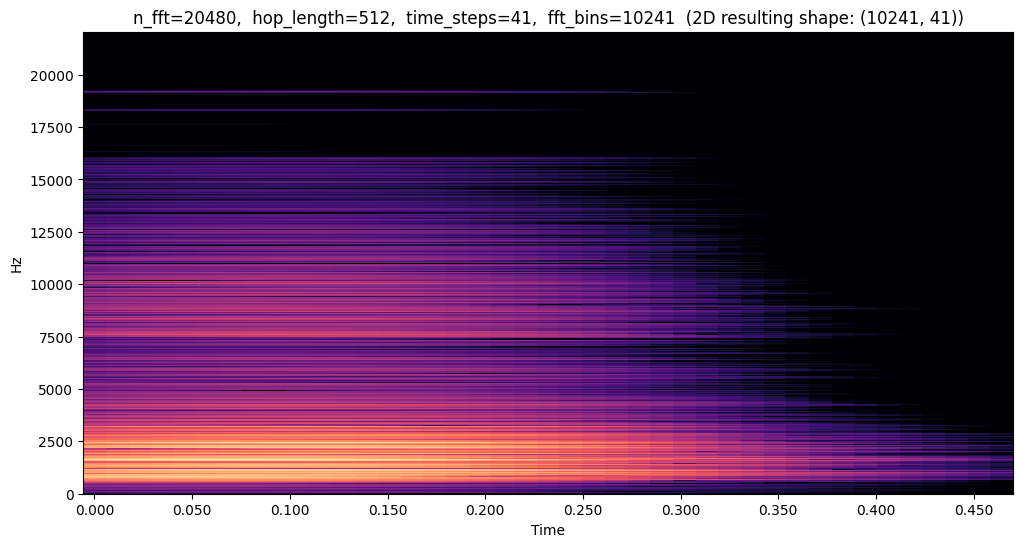

In [22]:
hop_length = 512
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear',
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length,
                       stft_magnitude_db.shape[1],
                       stft_magnitude_db.shape[0],
                       stft_magnitude_db.shape));

In [27]:
bark = data > 0.001
clean_bark = 'clean_bark.wav'
sf.write(clean_bark, data[np.argmax(bark):(len(data) - np.argmax(noise[::-1]))], sample_rate)

ipd.Audio(clean_bark)


### 4. Сбор данных через VK API

In [1]:
token='vk1.a.vmCpZRcPL_kAuvpaWc4piS2fqodFUdS2ez1qznC4QDTUoltFm0VXgIL1GKZDqRe7g4YWgnoBtQ__BIB7id3sAXh7tw3y_ChVDLv_p0szUosuTRt7cEsQP4wLndFWLN_QFUG6xfTWOO2UFmNHkGNrnVHzA-kRhlk65PjulMjrZOWqLzWApzpLolS2KLXFlx8Y'

In [5]:
# https://vk.com/arkhlikbez
ID = 'arkhlikbez'

import requests
from datetime import datetime

num_item = 0
json_response = requests.get(('https://api.vk.com/method/wall.get?count=2000&offset={}&domain={}&v=5.103&access_token=' + token).\
                        format(0, ID)).json()

posts = []
for item in json_response['response']['items']:
        message = {
            'text': item['text']
        }
        posts.append(message)

        num_item += 1

with open('posts.txt', 'w+', encoding='utf-8') as file:
    for post in posts:
        file.write(f"{post['text']}\n")

with open('posts.txt', 'r', encoding='utf-8') as file:
    writen_posts = file.read()
    print(writen_posts)

Наше новое видео про московский район Курьяново. 

https://www.youtube.com/watch?v=-4FFixw_Wyo
Отреставрированный жилой дом 1890-1891 гг. постройки. 
 
Рабочего штаба, 4, Иркутск.
Детали храма во имя Знамения Божией Матери. 
 
Храм был построен в 1757-1794 гг. на средства иркутского купца Ивана Бичевина в Знаменском предместье города Иркутска. 
 
Ангарская 14, Иркутск.
Костромские волонтеры привели в порядок домик с резными наличниками у Ипатьевского монастыря, было — стало.
Мариинский Посад, небольшой купеческий спокойный городок Чувашии.

Этим домам серии П-3 на юго-западе Москвы уже пятьдесят лет, но старички смотрятся хорошо, потому что жители следят за фасадом. 

Фото Дениса Ромодина.
Усадьба Щербова в Гатчине 

Дом был построен архитектором С. С. Кричинским в 1911 году в стиле северного модерна, но из-за его геометрической формы отсылает к архитектуре авангарда. По словам современников, дом по своей оригинальности соответствовал его хозяину — художнику-карикатуристу П. Е. Щербову